# 使用自動微分估算簡單線性迴歸的參數(w、b)
## $ y = wx + b$

## 產生隨機資料

In [1]:
# 若出現以下錯誤，請執行本格
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# 載入套件
import numpy as np 
import tensorflow as tf 

# 產生線性隨機資料100筆，介於 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 資料加一點雜訊(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 建立模型

In [3]:
# 定義完全連接層(Dense)
# units：輸出神經元個數，input_shape：輸入神經元個數
layer1 = tf.keras.layers.Input([1]) 
layer2 = tf.keras.layers.Dense(units=1) 

# 神經網路包含一層完全連接層
model = tf.keras.Sequential([layer1, layer2])

In [4]:
# 定義模型的損失函數(loss)為 MSE，優化器(optimizer)為 adam
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam())

## 模型訓練

In [5]:
history = model.fit(X, y, epochs=500, verbose=False)

## 訓練過程繪圖

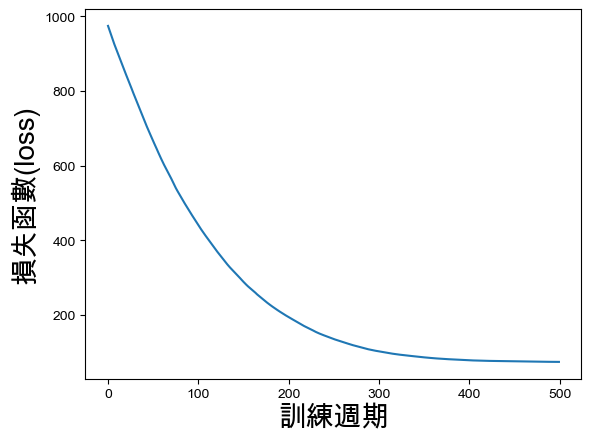

In [6]:
import matplotlib.pyplot as plt

# 修正中文亂碼 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

plt.xlabel('訓練週期', fontsize=20)
plt.ylabel("損失函數(loss)", fontsize=20)
plt.plot(history.history['loss'])

## 取得模型參數

In [7]:
w = layer2.get_weights()[0][0][0]
b = layer2.get_weights()[1][0]

print(f"w：{w:.4f} , b：{b:.4f}")

w：0.9049 , b：1.0423


## 繪圖顯示迴歸線

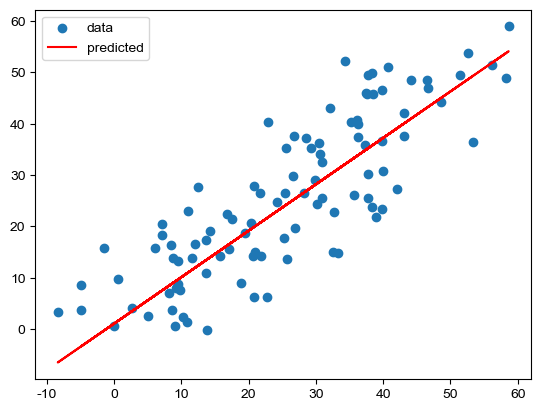

In [8]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, X * w + b, 'r-', label='predicted')
plt.legend()